# Project: Predicting Car Price.

## Table of Contents

<ul>
<li><a href="#PS">Problem Statement</a></li>
<li><a href="#DG">Data Gathering</a></li>
<li><a href="#DA">Data Assessing</a></li>
<li><a href="#DC">Data Cleansing</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions & Inference</a></li>
</ul>

<a id="PS"></a>
# Problem Statement.

> Predicting the price of the new cars based on the features that they have by tarining a Linear Regression Model with Automobile data to learn from its attributes and map the price to the new cars.

<a id="DG"></a>
# Data Gathering & Importing the needed Libraries.

In [1]:
#importing Libs with its aliases
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
car = pd.read_csv('E:\Basics of ML & Python\Automobile_data.csv', na_values='?') 

In [3]:
# read 1st 10 rows using head method
car.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


<a id="DA"></a>
# Data Assessing.

## Checking the Tidiness and the Quality of the data and document all the issues that need to be cleaned.
> 1st define the issues

> 2nd document the issues

In [4]:
#checking the type and the missing values in the dataframe
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-

In [5]:
#calculating the no. of missing values for each series
car.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
#checking the object series in our dataframe for further inspection to our data
obj_car = car.select_dtypes(include=['object'])
obj_car.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


## Documenting the issues that we need to clean.

<li>Missing Values for both categorical & numerical data</li>
<li>Converting (num-of-doors & num-of-cylinders) inputs to be "integers" rather than "string"</li>
<li>Restructure some of object columns to and encode it</li>

<a id="DC"></a>
# Data Cleansing.

> We will impute the missing values in our dataframe with the mean of the series

> Substituting all of the sting values that could be replaced with intgers

> Using get_dummies method to restructure object columns


In [7]:
#creating mean series to impute numerical columns with 
mean = car.mean().round(2)

In [8]:
car_cleaned = car.fillna(mean)

In [9]:
car_cleaned.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
#filtering the dataframe with the missing values of num-of-doors
car_cleaned[car_cleaned['num-of-doors'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,122.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


#### These are 2 missing values out of 205 entries so we can impute them with the occuring number of doors for Sedan cars

In [11]:
#Getting the most repated number of doors for sedan cars
car_cleaned[car_cleaned['body-style'] == "sedan"]['num-of-doors'].value_counts()

four    79
two     15
Name: num-of-doors, dtype: int64

In [12]:
#imputing the mssing values for sedan cars with "four"
car_cleaned['num-of-doors'] = car_cleaned['num-of-doors'].fillna('four')

In [13]:
car_cleaned.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [14]:
car_cleaned.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Now we need to replace the values of (num-of-doors & num-of-cylinders) with numerical values

In [15]:
# Replacing num-of-doors
car_cleaned['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [16]:
car_cleaned['num-of-doors'] = car_cleaned['num-of-doors'].replace({'two':2 , 'four':4})

In [17]:
# Replacing num-of-doors
car_cleaned['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [18]:
car_cleaned['num-of-cylinders'] = car_cleaned['num-of-cylinders'].replace({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})

In [19]:
#Updating the object dataframe 
obj_car = car_cleaned.select_dtypes(include=['object'])
obj_car.columns

Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'fuel-system'],
      dtype='object')

## Restructuring the dataframe

In [20]:
#using get_dummies with object columns
new_car = pd.get_dummies(car_cleaned, columns=['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels','engine-location', 'engine-type', 'fuel-system'],drop_first=True)
print(new_car.columns)
len(new_car.columns)

Index(['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'fuel-type_gas',
       'aspiration_turbo', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_fwd',
       'drive-wheels_rwd', 'engine-location_rear', 'engine-type_dohcv',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv', 'engine-type_rotor', 'fuel-system_2bbl',
       

61

In [21]:
new_car.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,1,0,0,0,0,0,1,0,0
3,2,164.0,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,0,0,1,0,0


<a id="eda"></a>
# Exploratory Data Analysis (EDA).

Now we will be conducting some summary statistics on our data in order to check the correclation between its features and visualize it properly 

In [22]:
new_car.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,3.131707,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,...,0.073171,0.063415,0.019512,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,1.245307,31.681008,0.993715,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,...,0.261054,0.244304,0.138655,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,122.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,137.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
#checking the correlation between variables
new_car.corr()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
symboling,1.000000,4.651899e-01,-0.663595,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,...,0.037513,-0.013597,0.245950,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,6.570742e-02
normalized-losses,0.465190,1.000000e+00,-0.357192,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.108081,0.110997,...,-0.211597,0.141869,0.124984,-0.148000,0.107971,-0.101437,0.050954,0.200111,0.064037,2.951476e-18
num-of-doors,-0.663595,-3.571925e-01,1.000000,0.439635,0.385675,0.197735,0.540286,0.190720,-0.019503,0.013919,...,0.019357,-0.054764,-0.161052,0.013769,-0.139129,0.188496,-0.079932,0.035746,-0.148565,-7.993167e-02
wheel-base,-0.531954,-5.651842e-02,0.439635,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,...,-0.183195,0.166152,-0.081174,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-3.212874e-02
length,-0.357612,1.920863e-02,0.385675,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,...,-0.118320,0.244053,-0.057877,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-8.244719e-03
width,-0.232919,8.419470e-02,0.197735,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,...,-0.124446,0.348869,-0.013699,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-2.315750e-02
height,-0.541038,-3.707060e-01,0.540286,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,...,-0.046670,-0.065063,-0.238720,-0.079418,-0.206225,0.284631,-0.101245,0.108685,-0.278615,-6.677758e-02
curb-weight,-0.227691,9.778529e-02,0.190720,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,...,-0.080295,0.400878,-0.039196,-0.577159,-0.040801,0.217275,0.034431,0.520220,-0.002434,2.405214e-02
num-of-cylinders,-0.113129,1.080814e-01,-0.019503,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,...,0.005085,0.650738,-0.311453,-0.252848,-0.269058,-0.024544,-0.024707,0.392551,-0.075619,-2.470703e-02
engine-size,-0.105790,1.109969e-01,0.013919,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,...,-0.016508,0.562403,-0.184762,-0.442562,-0.166946,0.069594,0.049033,0.483520,0.004490,-1.332714e-02


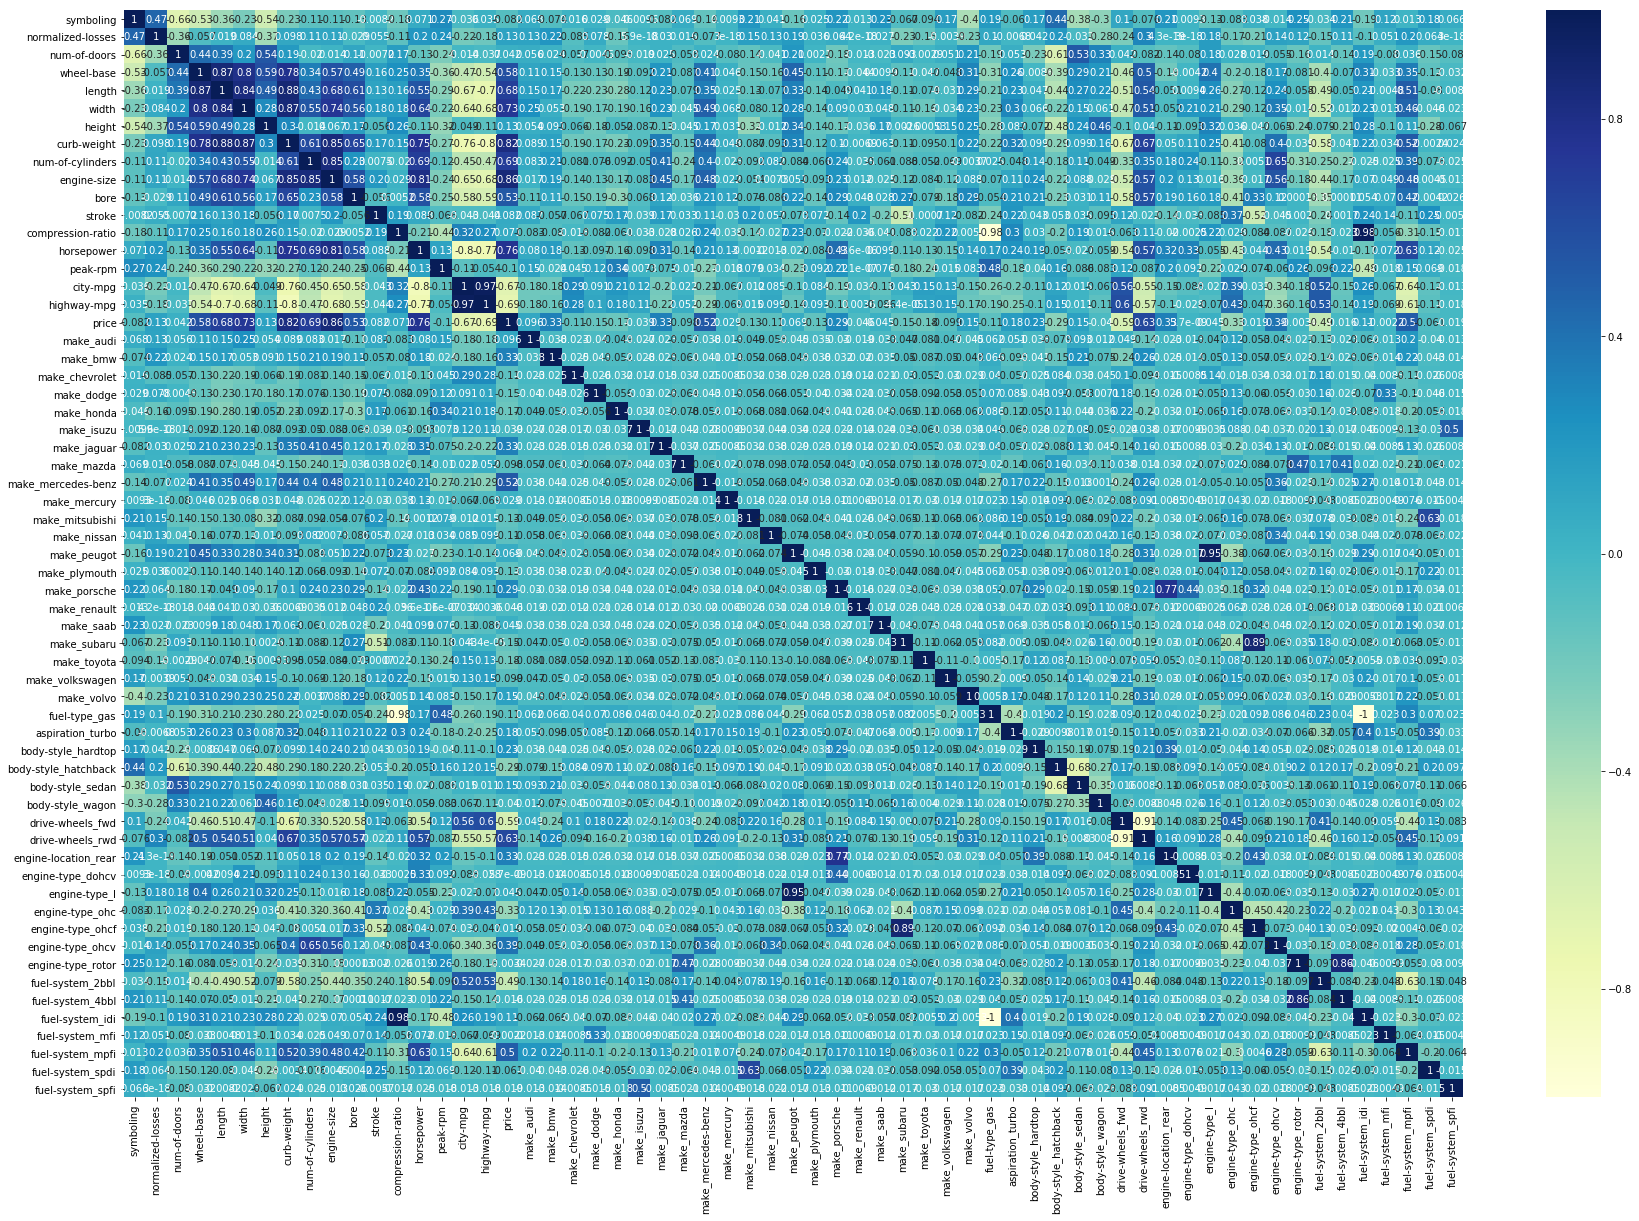

In [24]:
plt.figure(figsize=(30,20))
sns.heatmap(new_car.corr(),annot=True,cmap="YlGnBu");

### Now we will drop all of the highly postive or negative correlated variables

In [25]:
new_car = new_car.drop(['length','width','height'], axis=1)

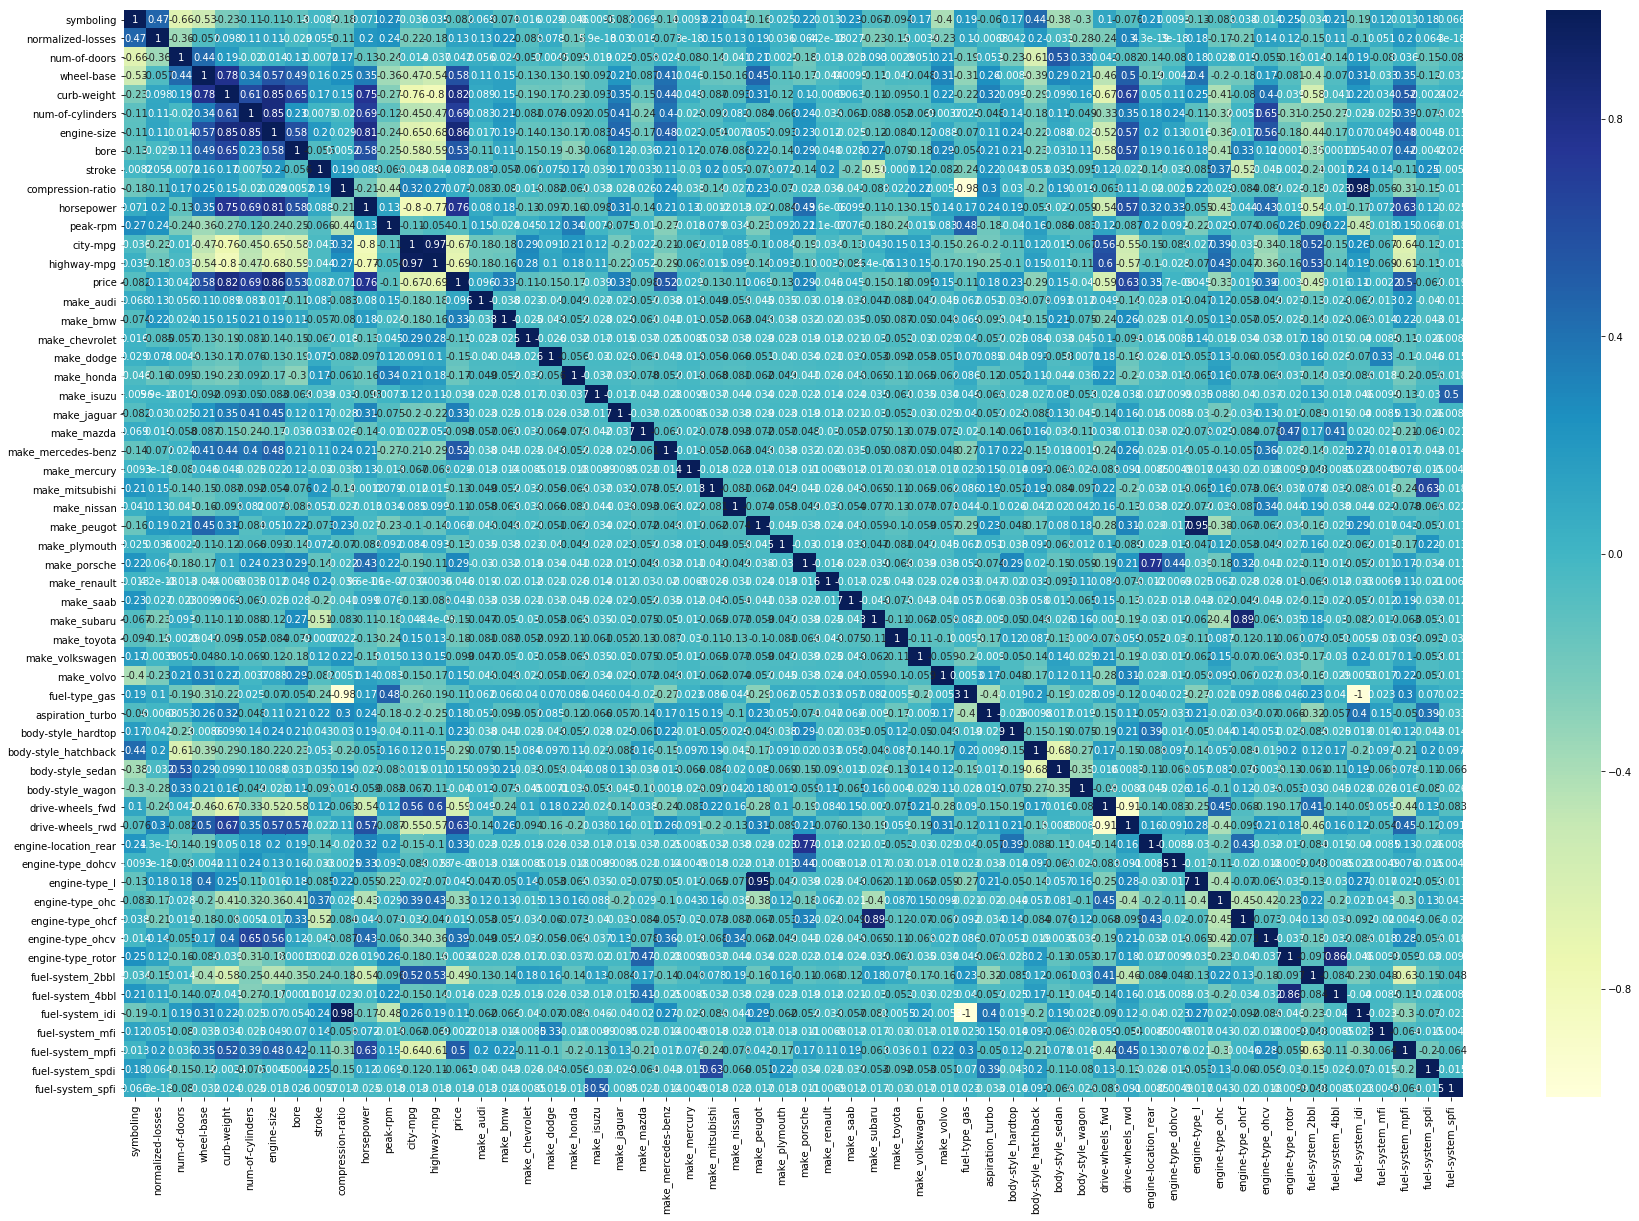

In [26]:
#rerun the plot again and check the correlation once more
plt.figure(figsize=(30,20))
sns.heatmap(new_car.corr(),annot=True,cmap="YlGnBu");

In [27]:
#droping all of the brands features and engine size
new_car = new_car.drop(['engine-size','make_audi','make_bmw','make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen','make_volvo','fuel-system_idi'], axis=1)

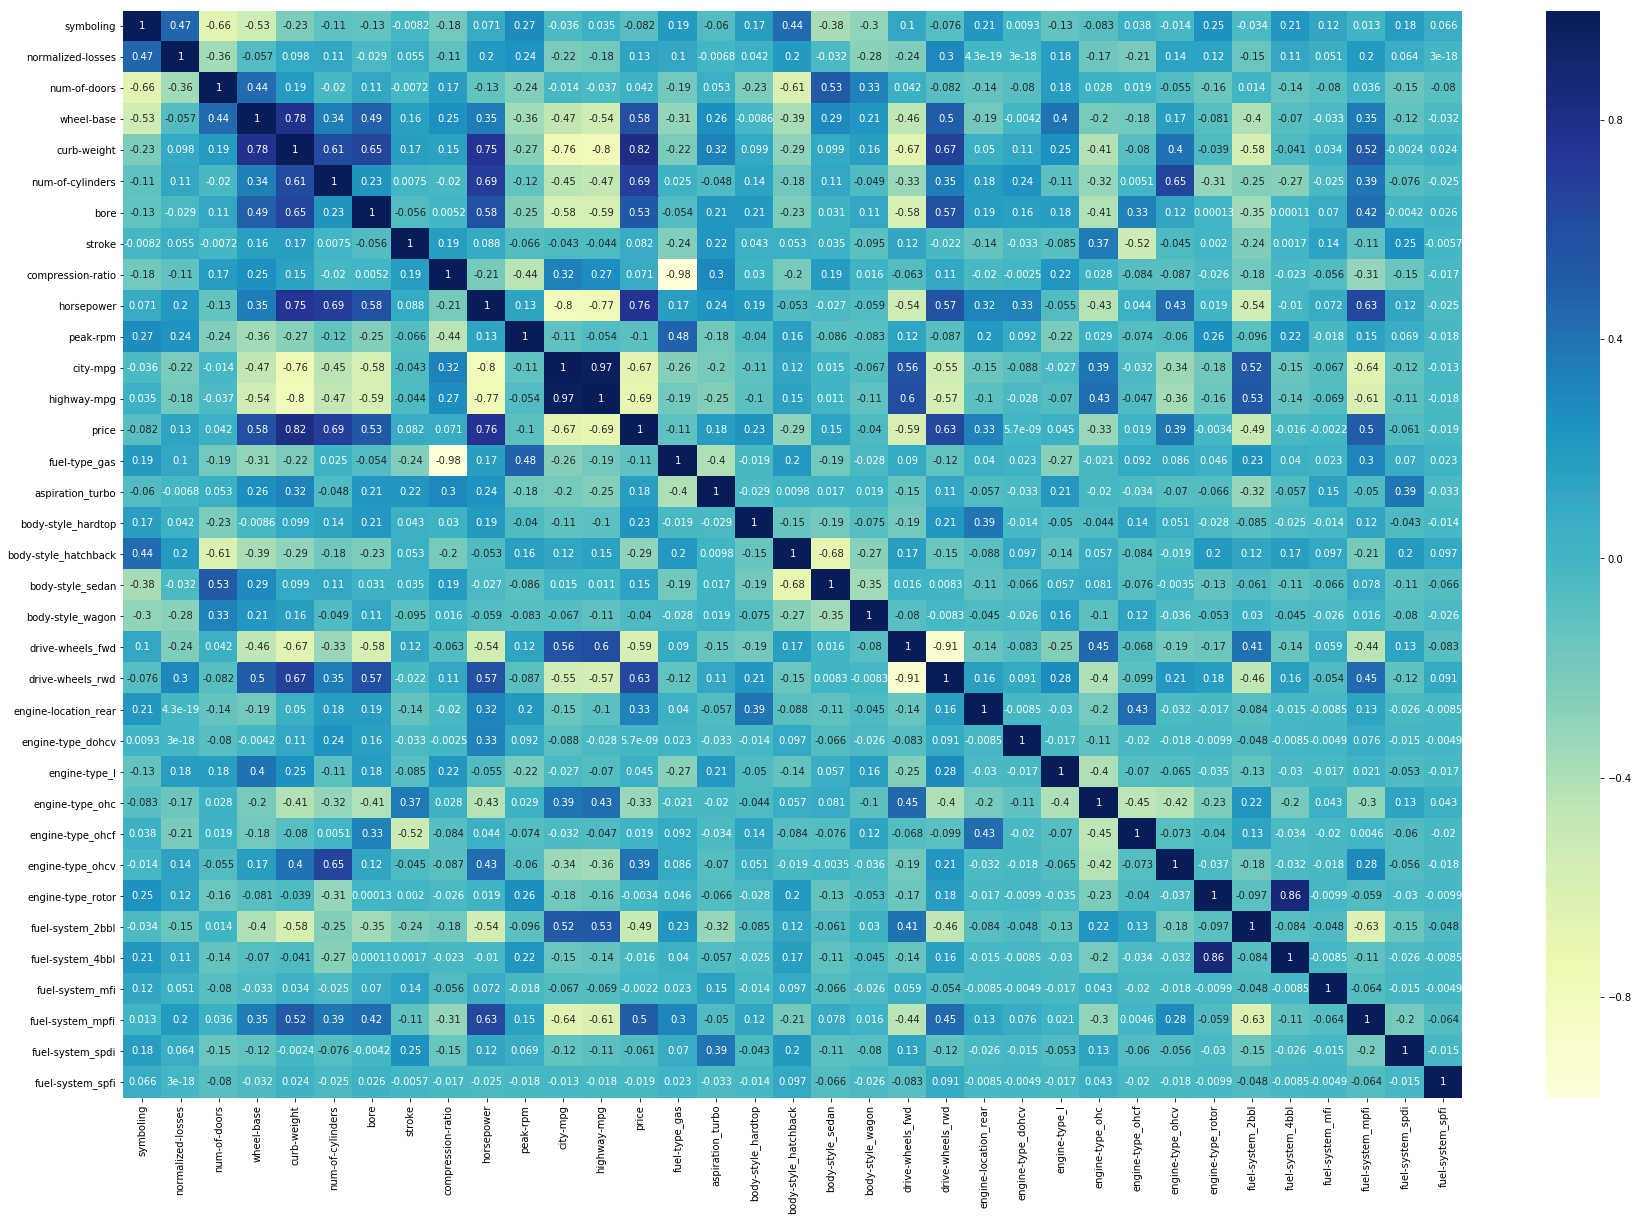

In [28]:
#rerun the plot again and check the correlation once more
plt.figure(figsize=(30,20))
sns.heatmap(new_car.corr(),annot=True,cmap="YlGnBu");

### Now we have cleaned our data, checked for correlations and draw neat Viz to understand it better.

#### Time to feed this data into Linear Regression model and predict the price of the cars based on its features.

# Prediction.
> Using Sklearn to scale the data, fit it to the model then making predictions on the holdout data

In [29]:
# importing Sklearn package and a scaler to normlize our features
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [30]:
#Normalizing the data 
scaler = MinMaxScaler()
scaler.fit_transform(new_car)

array([[1.        , 0.29842932, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.29842932, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.6       , 0.29842932, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.2       , 0.15706806, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.2       , 0.15706806, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.15706806, 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [31]:
#Dividing the data into two sets"training" to train the model on & "testing" to make predictions on unseen 
X = new_car.drop('price',axis=1)
y = new_car['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
#Fit & predict
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
pred_y = model.predict(X_test)

In [34]:
pred_y

array([ 9645.37900059, 25812.83863797,  8211.08734154, 27849.09846077,
        5971.281569  ,  8577.08549609,  4134.74443522,  6903.12024457,
        5681.48410704, 15714.21554014, 10049.70600406,  9256.13681371,
       19966.50800945, 27709.17339192, 44400.09696431, 19036.85036239,
       24686.34396821, 19598.02496125,  6825.48926431, 13260.01681879,
       22513.04337944,  9860.4951109 ,  5867.02089424,  8217.42537409,
        7075.42014885,  9878.01584917, 13475.89162931,  8449.29415223,
        8555.61231242, 21031.35946092,  8542.47632821,  5121.5592995 ,
       12279.36844402,  9356.94226627,  8050.02932325, 12382.24388306,
       10329.47898971, 19162.64908444, 20352.06699213,  7767.38513671,
       11133.78377625, 35632.4828809 , 13010.43610232, 14689.77074429,
       39834.43747769, 15673.37509342, 21954.57855767,  6648.77481791,
       13196.2417952 ,  6798.8754345 , 10376.73219132, 10049.56668051,
       18294.79663978,  6254.33750804, 15246.95151301, 18083.02844902,
      

In [35]:
#Evaluating the performance of the model using Root square metrics
r2_score(y_test,pred_y)

0.8631442813539947

<a id="conclusions"></a>
## Conclusions.

> So according to the used metrics our model's accuracy is 86% which means that we are able to use this model to predict the price of the new cars and the results will 86% accurate